#**Churn Modelling**


**Importing the libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


**Importing the dataset**

https://www.kaggle.com/shubh0799/churn-modelling

In [2]:
dataSet = pd.read_csv('/content/drive/My Drive/data/Churn_Modelling.csv')

**Data Exploration and Visualization**

In [3]:
# print out some data
print('Data shape (rows, cols): ', dataSet.shape)
dataSet.head(10)

Data shape (rows, cols):  (10000, 14)


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [4]:
dataSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
dataSet.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [6]:
X = dataSet.iloc[:, 3:-1].values
y = dataSet.iloc[:, -1].values

In [7]:
false = y[y == 0].shape[0]
true = y[y == 1].shape[0]

False:		 7963
True:		 2037


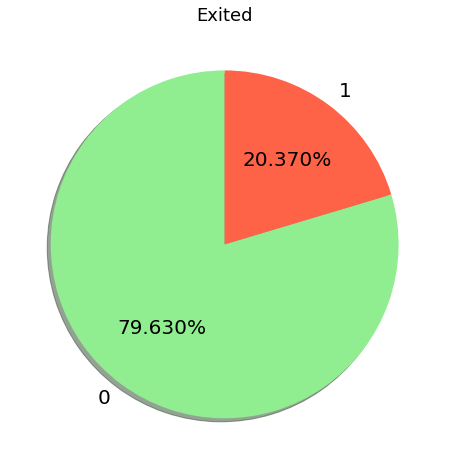

In [8]:
print('False:\t\t', false)
print('True:\t\t', true)

plt.figure(figsize=(12, 8))
font = {'weight': 'normal','size': 20}
plt.rc('font', **font)
plt.title('Exited', size=18)
plt.pie([false, true], labels=['0', '1'], colors=['lightgreen', 'tomato'], autopct='%1.3f%%', shadow=True, startangle=90)
plt.show()

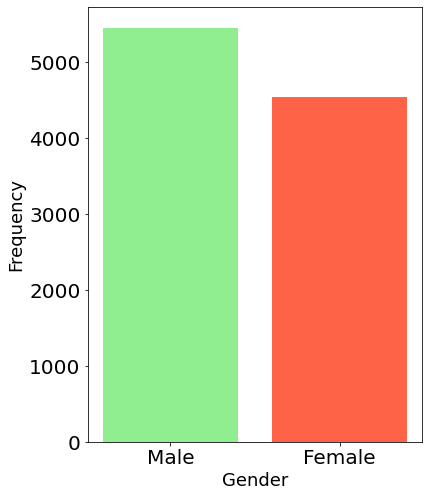

In [9]:
gender = dict(dataSet['Gender'].value_counts())

plt.figure(figsize=(6, 8))
plt.bar(gender.keys(), 
        gender.values(),
        color = ['lightgreen', 'tomato'])
plt.xlabel('Gender', size=18)
plt.ylabel('Frequency', size=18)
plt.show()

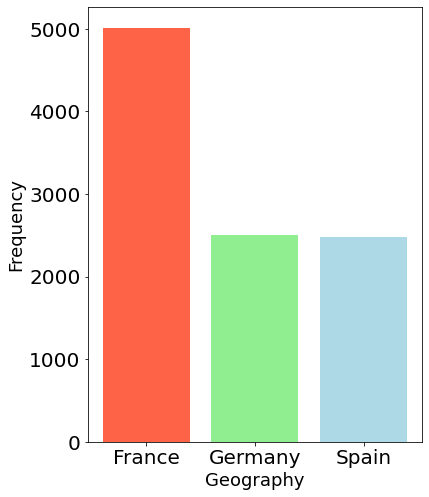

In [10]:
geo = dict(dataSet['Geography'].value_counts())

plt.figure(figsize=(6, 8))
plt.bar(geo.keys(), 
        geo.values(), 
        color=['tomato', 'lightgreen', 'lightblue'])
plt.xlabel('Geography', size=18)
plt.ylabel('Frequency', size=18)
plt.show()

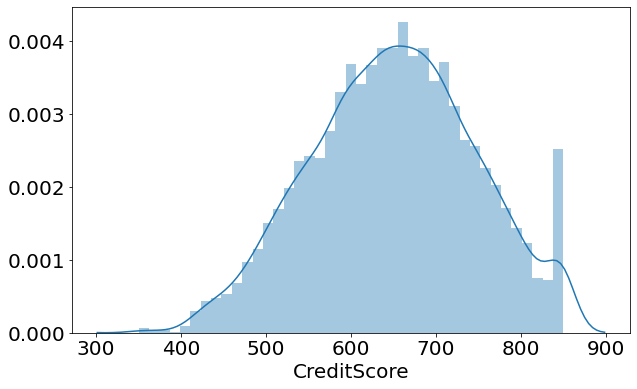

In [11]:
#CreditScore dist

plt.figure(figsize=(10, 6))
sns.distplot(dataSet['CreditScore'])
plt.show()

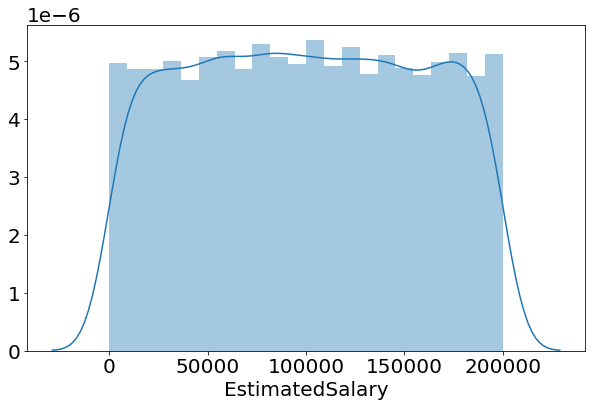

In [12]:
#EstimatedSalary dist

plt.figure(figsize=(10, 6))
sns.distplot(dataSet['EstimatedSalary'])
plt.show()

**Encoding categorical data**

In [13]:
# Label Encoding the "Gender" column
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
X[:, 2] = le.fit_transform(X[:, 2])

X

array([[619, 'France', 0, ..., 1, 1, 101348.88],
       [608, 'Spain', 0, ..., 0, 1, 112542.58],
       [502, 'France', 0, ..., 1, 0, 113931.57],
       ...,
       [709, 'France', 0, ..., 0, 1, 42085.58],
       [772, 'Germany', 1, ..., 1, 0, 92888.52],
       [792, 'France', 0, ..., 1, 0, 38190.78]], dtype=object)

In [14]:
# One Hot Encoding the "Geography" column
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

X

array([[1.0, 0.0, 0.0, ..., 1, 1, 101348.88],
       [0.0, 0.0, 1.0, ..., 0, 1, 112542.58],
       [1.0, 0.0, 0.0, ..., 1, 0, 113931.57],
       ...,
       [1.0, 0.0, 0.0, ..., 0, 1, 42085.58],
       [0.0, 1.0, 0.0, ..., 1, 0, 92888.52],
       [1.0, 0.0, 0.0, ..., 1, 0, 38190.78]], dtype=object)

**Splitting the dataset into the Training set and Test set**

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

**Feature Scaling**

In [16]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [17]:
def report(y_test, y_pred):
  from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score
  import seaborn as sns

  cm = confusion_matrix(y_test, y_pred)
  print('Accuracy:', accuracy_score(y_test, y_pred), sep='\t')
  print('Precision:', precision_score(y_test, y_pred), sep='\t')
  print('Recall:', recall_score(y_test, y_pred), sep='\t\t')
  print('\n')

  plt.figure(figsize=(8, 6))
  sns.heatmap(cm, annot=True, cmap=plt.cm.Blues, fmt = 'd', annot_kws={"size": 35}).set_title('Confusion Matrix')
  plt.show()

##Training The Model Using RandomForestClassifier

In [18]:
final_acc = {}

Accuracy:	0.867
Precision:	0.740484429065744
Recall:		0.528395061728395




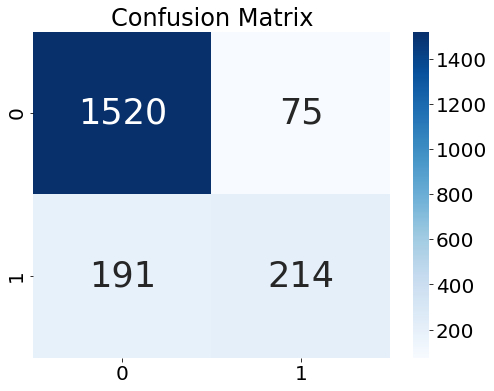

In [19]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators = 55, 
                               random_state=0)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

report(y_test, y_pred)
final_acc['RandomForestClassifier'] = accuracy_score(y_test, y_pred)

##Training The Model Using XGBClassifier

Accuracy:	0.8695
Precision:	0.7834645669291339
Recall:		0.49135802469135803




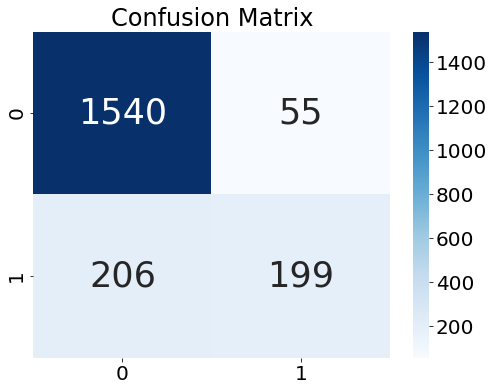

In [20]:
from xgboost import XGBClassifier

model = XGBClassifier(n_estimators = 34)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

report(y_test, y_pred)
final_acc['XGBClassifier'] = accuracy_score(y_test, y_pred)

#Training The Model Using AdaBoostClassifier

Accuracy:	0.867
Precision:	0.7662835249042146
Recall:		0.49382716049382713




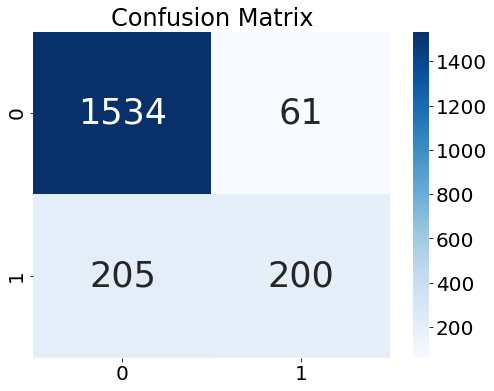

In [21]:
from sklearn.ensemble import AdaBoostClassifier

model = AdaBoostClassifier(n_estimators = 13,
                           random_state = 0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

report(y_test, y_pred)
final_acc['AdaBoostClassifier'] = accuracy_score(y_test, y_pred)

#Training The Model Using SVC

Accuracy:	0.866
Precision:	0.7939914163090128
Recall:		0.4567901234567901




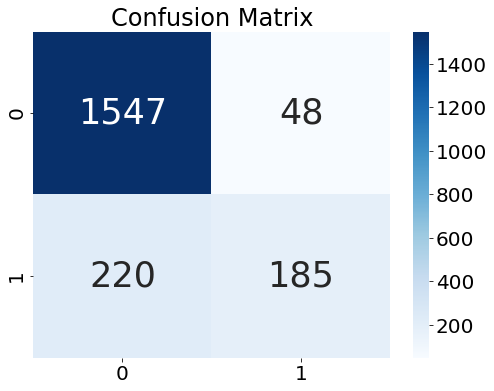

In [22]:
from sklearn.svm import SVC

model = SVC(kernel = 'rbf',
            gamma = 0.1,
            random_state = 0)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

report(y_test, y_pred)
final_acc['SVC'] = accuracy_score(y_test, y_pred)

##Training The Model Using GradientBoostingClassifier

Accuracy:	0.871
Precision:	0.779467680608365
Recall:		0.5061728395061729




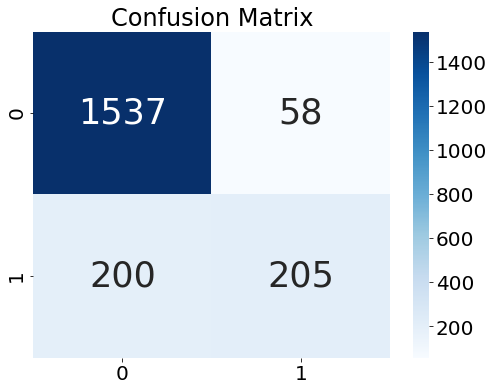

In [23]:
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier(n_estimators = 100,
                                   max_depth = 2, 
                                   loss = 'deviance',
                                   random_state = 0)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

report(y_test, y_pred)
final_acc['GradientBoostingClassifier'] = accuracy_score(y_test, y_pred)

In [24]:
#Accuracy Comparison

pd.DataFrame(index = final_acc.keys(),
             data = final_acc.values(),
             columns = ['Accuracy']).sort_values(by=['Accuracy'], ascending=False)

,Accuracy
GradientBoostingClassifier,0.8710
XGBClassifier,0.8695
RandomForestClassifier,0.8670
AdaBoostClassifier,0.8670
SVC,0.8660
